# Video Games Sales

## Data Set 
 list of video games with sales greater than 100,000 copies

## Data Structure 

- Rank - Ranking of overall sales

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.)

- Year - Year of the game's release

- Genre - Genre of the game

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.


## Data Prepration

### Importing and Reading Date

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('vgsales.csv')
df_orignal = df.copy()

### Observation 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [7]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [8]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Paradox Development                1
Bohemia Interactive                1
Societa                            1
Yumedia                            1
Culture Publishers                 1
Name: Publisher, Length: 578, dtype: int64

In [9]:
df['Rank'].value_counts()

2047     1
10864    1
6822     1
677      1
2724     1
        ..
1354     1
7497     1
5448     1
11583    1
2049     1
Name: Rank, Length: 16598, dtype: int64

### Checking for duplicated and null rows

In [10]:
len(df)

16598

In [11]:
len(df.dropna())

16291

In [12]:
len(df.drop_duplicates())

16598

In [13]:
### Remove null rows

In [14]:
df = df.dropna()

## Analysis 

In this dataset we will interested in answering these question

Q1 - what is the most published game genre

Q2 - what is the most published games platform

Q3 - what is the top platform sales

Q4 - what are the global sales per publisher

Q5 - what are the top 5 globally selling games

Q6- what is games global sales trend over the year

### Q1 - what is the most published game genre

In [17]:
df_g = df['Genre'].value_counts().rename_axis('Genre').to_frame('Game Counts')

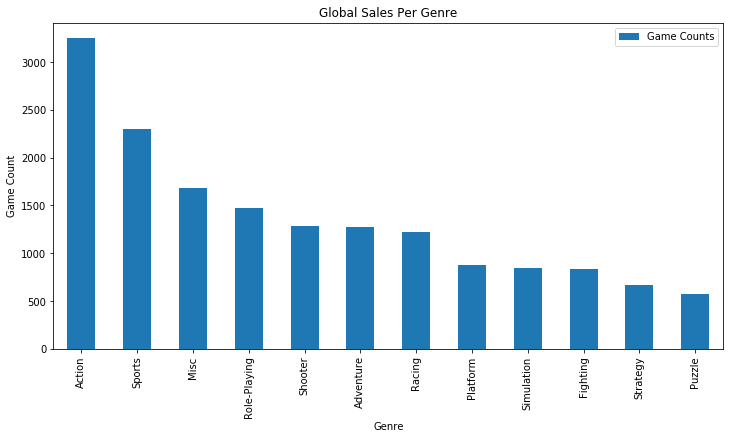

In [18]:
df_g.plot.bar(figsize = (12,6))
plt.title('Global Sales Per Genre')
plt.xlabel('Genre')
plt.ylabel('Game Count');

We see here that **Action** is the top game genre and second is **Sport** and third **Misc**

### Q2 - what is the most published games platform 

In [ ]:
df_p = df['Platform'].value_counts().rename_axis('Platform').to_frame('Total')

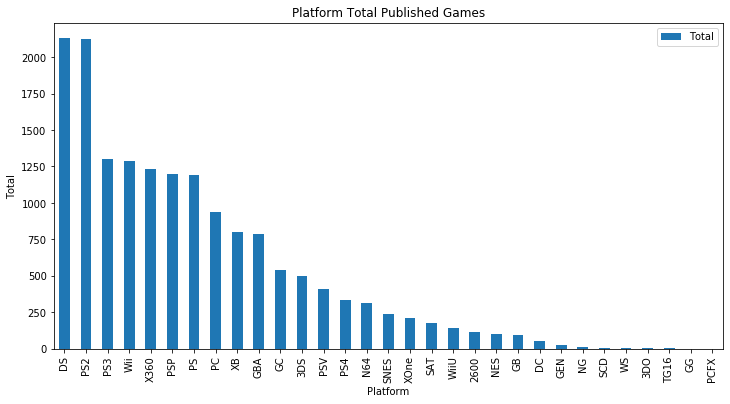

In [280]:
df_p.plot.bar(figsize = (12,6))
plt.title('Platform Total Published Games')
plt.xlabel('Platform')
plt.ylabel('Total');

The result shows **DS** is the first platform and very close to **PS2** in total game published and **ps3** third with a bit of a gap between the second  

### Q3 what is the top platform sales

In [210]:
df_ps = df['Global_Sales'].groupby(df['Platform']).sum().rename_axis('Global_Sales').to_frame('sum')

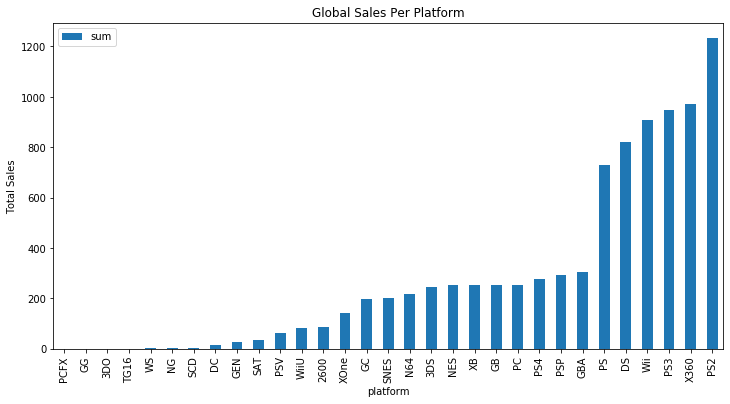

In [282]:
tm = df_ps.sort_values(by='sum')
tm.plot.bar(figsize = (12,6));

plt.title('Global Sales Per Platform')
plt.xlabel('platform')
plt.ylabel('Total Sales');

The top platform sales gos o **PS2** and second to it is **X360**

### Q4 - What are the global sales per publisher 

In [215]:
df_pus = df['Global_Sales'].groupby(df['Publisher']).sum().rename_axis('Global_Sales').to_frame('sum')

In [219]:
df_pus = df_pus[df_pus['sum']>100]

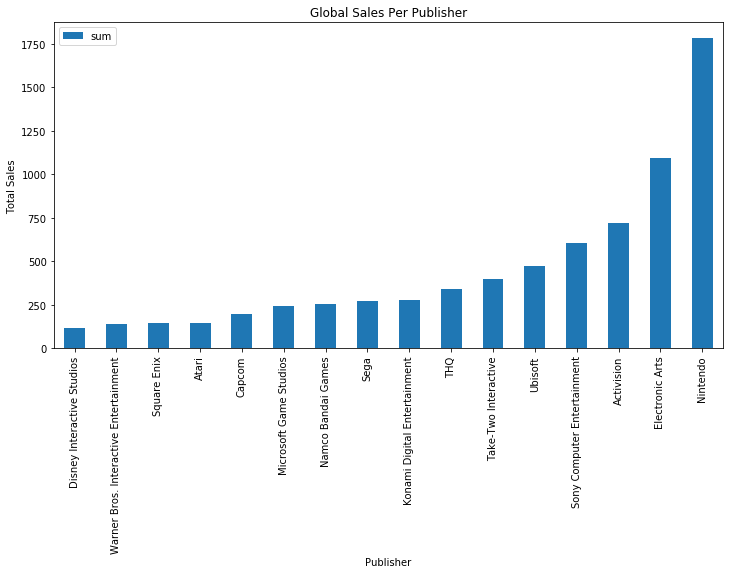

In [283]:
tm = df_pus.sort_values(by='sum')
tm.plot.bar(figsize = (12,6));

plt.title('Global Sales Per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Total Sales');

To compare publisher in total global sales over the years we see **Nintendo** is the first and second is **Electric Arts**

### Q5 - What are the top 5 globaly selling games

In [230]:
tmp = df.nlargest(5,'Global_Sales')

In [237]:
tmp = tmp[['Name','Global_Sales']]
tmp

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37


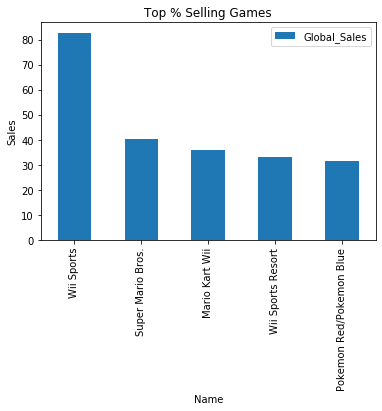

In [287]:
tmp.set_index('Name').plot.bar();

plt.title('Top % Selling Games')
plt.xlabel('Name')
plt.ylabel('Sales');

we found top games as follow :

- 1:Wii Sports
- 2:Super Mario Bros
- 3:Mario Kart Wii
- 4:Wii Sports Resort
- 5:Pokemon Red/Pokemon Blue

### Q6- what is the games global sales trend over the year

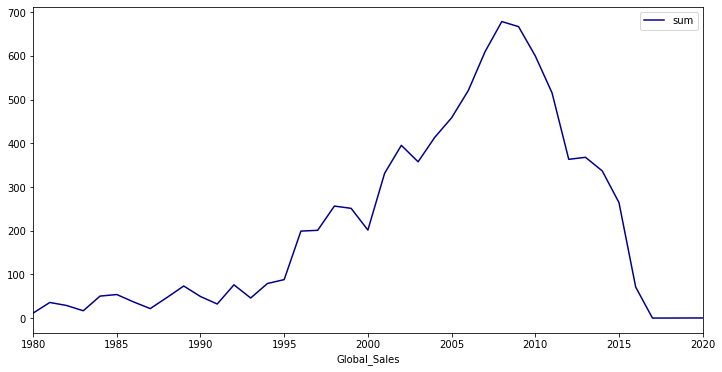

In [300]:
df_gls = df['Global_Sales'].groupby(df['Year']).sum().rename_axis('Global_Sales').to_frame('sum')
df_gls.plot.line(c='DarkBlue',figsize=(12, 6));

We observe a peak in global sales between 2005 and 2010